Celebal Technologies Pvt. Ltd.

Data Science Intern - Batch 1


Project: Classifying emails as spam or not spam based on their content and metadata using machine learning algorithms.

By

Muskan

B.E CSE (AI & ML)

Chandigarh University, Mohali, Punjab

Import Libraries

In [1]:
import pandas as pd

In [ ]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  


In [3]:


# Combine into one DataFrame
df = pd.concat([X, y], axis=1)

# Save as CSV
df.to_csv("spambase_dataset.csv", index=False)

print("✅ Dataset saved as spambase_dataset.csv")


✅ Dataset saved as spambase_dataset.csv


Load Dataset and Analysis

In [4]:
data = pd.read_csv("spambase_dataset.csv")
print("📊 Dataset loaded successfully!")

📊 Dataset loaded successfully!


In [5]:
data.head()  # Display the first few rows of the dataset

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
data.shape  # Display the shape of the dataset

(4601, 58)

In [7]:
data.dtypes  # Display the data types of each column

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [8]:
data.isnull().sum()  # Check for missing values in each column

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [9]:
data.describe()  # Get a statistical summary of the dataset

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Target Variable Distribution (spam or not)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3672\2176419813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.values.ravel(), palette='Set2')


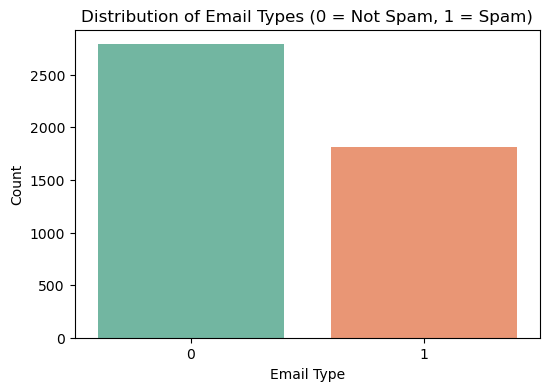

Class
0        2788
1        1813
Name: count, dtype: int64


In [11]:
# Distribution of target (0 = Not Spam, 1 = Spam)
plt.figure(figsize=(6, 4))
sns.countplot(x=y.values.ravel(), palette='Set2')
plt.title("Distribution of Email Types (0 = Not Spam, 1 = Spam)")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

# Print exact distribution
print(y.value_counts())


Correlation Heatmap (Top 15 Features)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3672\1460056213.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr[:30].values, y=target_corr[:30].index, palette="viridis")


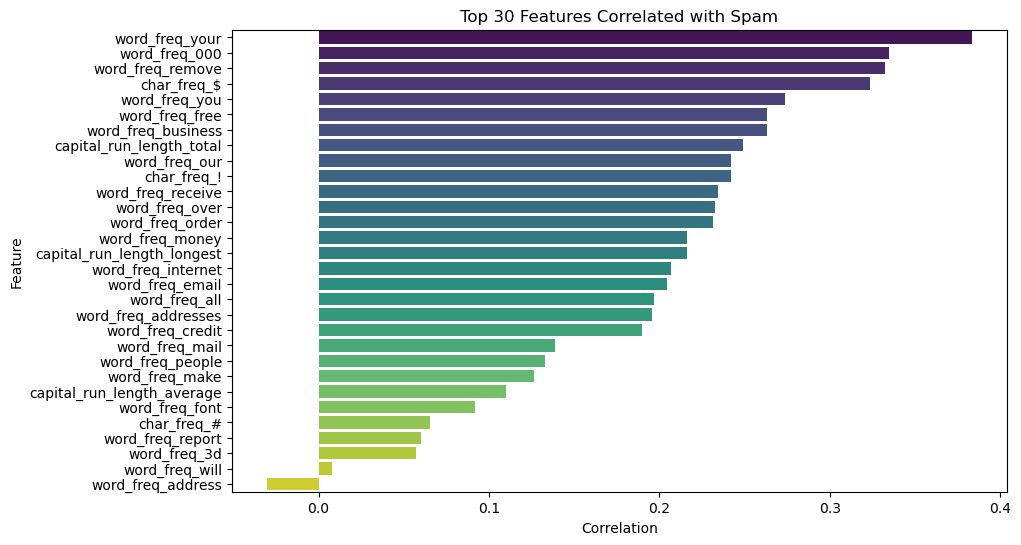

In [12]:
# Concatenate features and target temporarily for correlation
df_corr = pd.concat([X, y], axis=1)
correlation_matrix = df_corr.corr()

# Correlation of all features with the target
target_corr = correlation_matrix['Class'].drop('Class').sort_values(ascending=False)

# Plot top 15 correlated features with target
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr[:30].values, y=target_corr[:30].index, palette="viridis")
plt.title("Top 30 Features Correlated with Spam")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


Feature Distribution Example

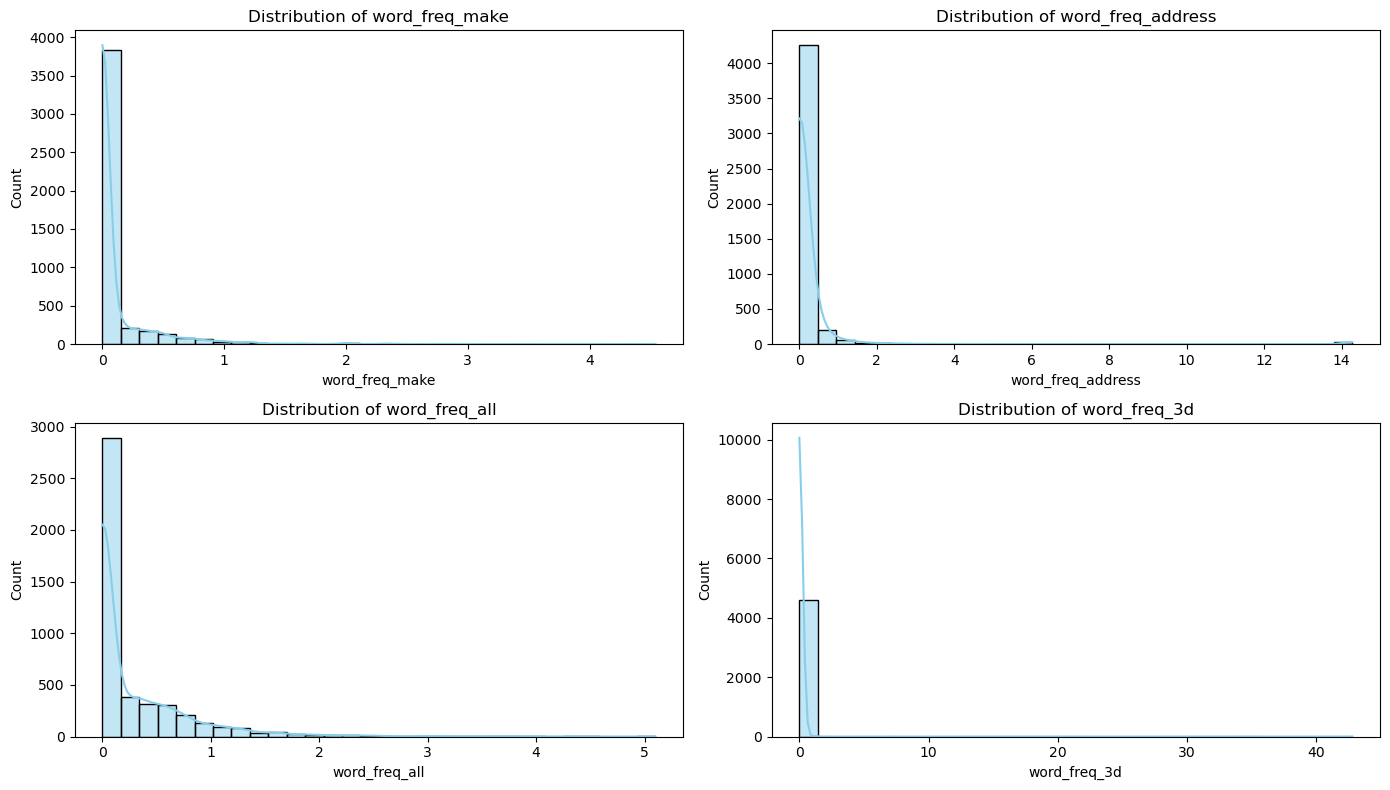

In [13]:
# Plot distributions of a few features
selected_features = X.columns[:4]

plt.figure(figsize=(14, 8))
for i, col in enumerate(selected_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(X[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Outlier Detection

In [14]:
import numpy as np

In [15]:
# Quick check for extreme outliers using z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(X))
outliers_counts = (z_scores > 3).sum(axis=0)
outliers_counts[outliers_counts > 0].sort_values(ascending=False) 

word_freq_george              123
word_freq_order               113
word_freq_original            107
word_freq_650                 107
word_freq_000                 107
word_freq_email               106
word_freq_report              106
word_freq_1999                105
word_freq_hpl                 105
word_freq_over                104
word_freq_will                102
word_freq_receive             100
word_freq_remove               99
word_freq_addresses            99
word_freq_business             97
word_freq_all                  94
word_freq_make                 90
word_freq_labs                 90
word_freq_people               89
word_freq_your                 87
word_freq_hp                   86
capital_run_length_total       86
word_freq_85                   82
word_freq_our                  81
word_freq_meeting              78
word_freq_internet             77
word_freq_data                 77
word_freq_technology           77
word_freq_credit               76
word_freq_mail

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3672\321944644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_counts.values, y=outliers_counts.index, palette="rocket")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3672\321944644.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


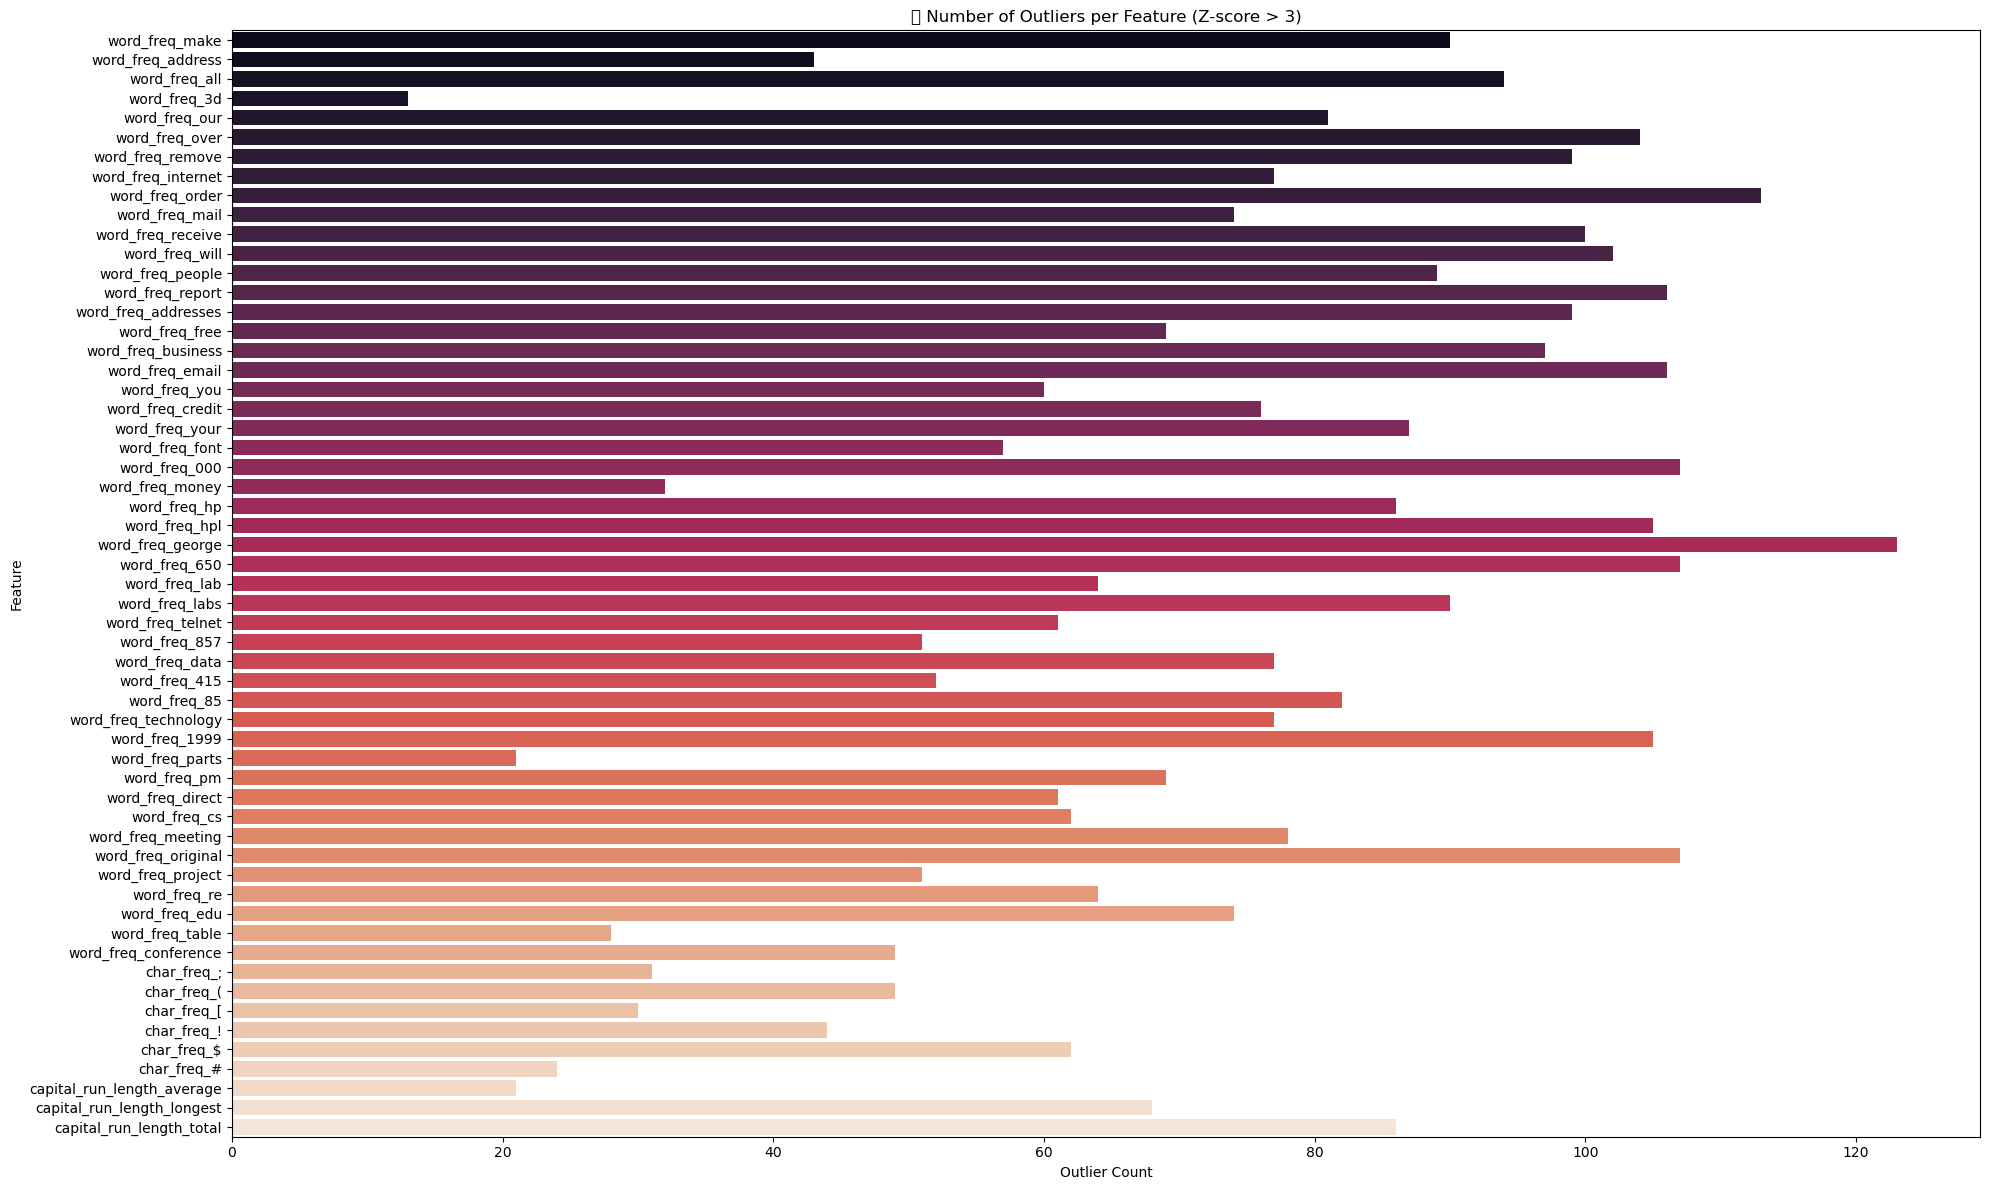

In [16]:

# Plot
plt.figure(figsize=(20, 12))
sns.barplot(x=outliers_counts.values, y=outliers_counts.index, palette="rocket")
plt.title("📊 Number of Outliers per Feature (Z-score > 3)")
plt.xlabel("Outlier Count")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Training all models using all features

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

In [20]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [23]:

# Train, predict and evaluate
results = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }
    
    # Save model for potential use
    trained_models[name] = model


e:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:13:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
# Convert to DataFrame and display
results_df = pd.DataFrame(results).T.sort_values(by='F1', ascending=False)
print("🔍 Model Evaluation Summary:")
print(results_df)

🔍 Model Evaluation Summary:
                     Accuracy  Precision    Recall        F1
XGBoost              0.956569   0.972973  0.923077  0.947368
Random Forest        0.955483   0.975477  0.917949  0.945839
SVM                  0.934853   0.950820  0.892308  0.920635
Logistic Regression  0.919653   0.931694  0.874359  0.902116
KNN                  0.895765   0.901639  0.846154  0.873016
Naive Bayes          0.821933   0.723320  0.938462  0.816964


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3672\3293776191.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


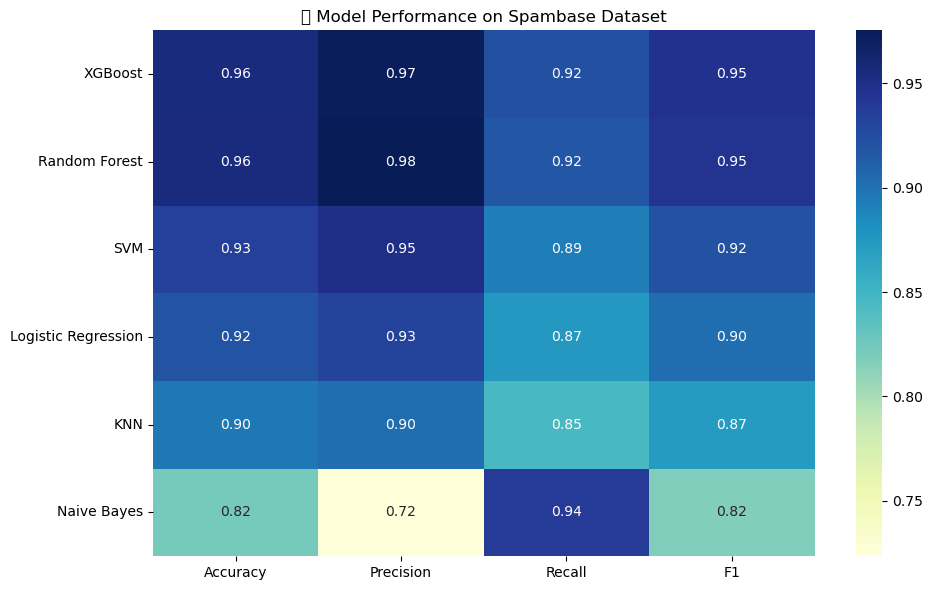

In [25]:
# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("📊 Model Performance on Spambase Dataset")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Therefore, Best Model is XGBoost.

In [26]:
# Get the best model name based on F1
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]

print(f"\n🏆 Best Model Based on F1 Score: {best_model_name}")


🏆 Best Model Based on F1 Score: XGBoost


In [27]:
import joblib
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_spam_model.pkl")



['xgboost_spam_model.pkl']

In [29]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']